In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
dataset=datasets.load_boston()

In [21]:
feature=pd.DataFrame(dataset.data,columns=dataset.feature_names)
feature['price']=dataset.target

In [22]:
feature.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
feature.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

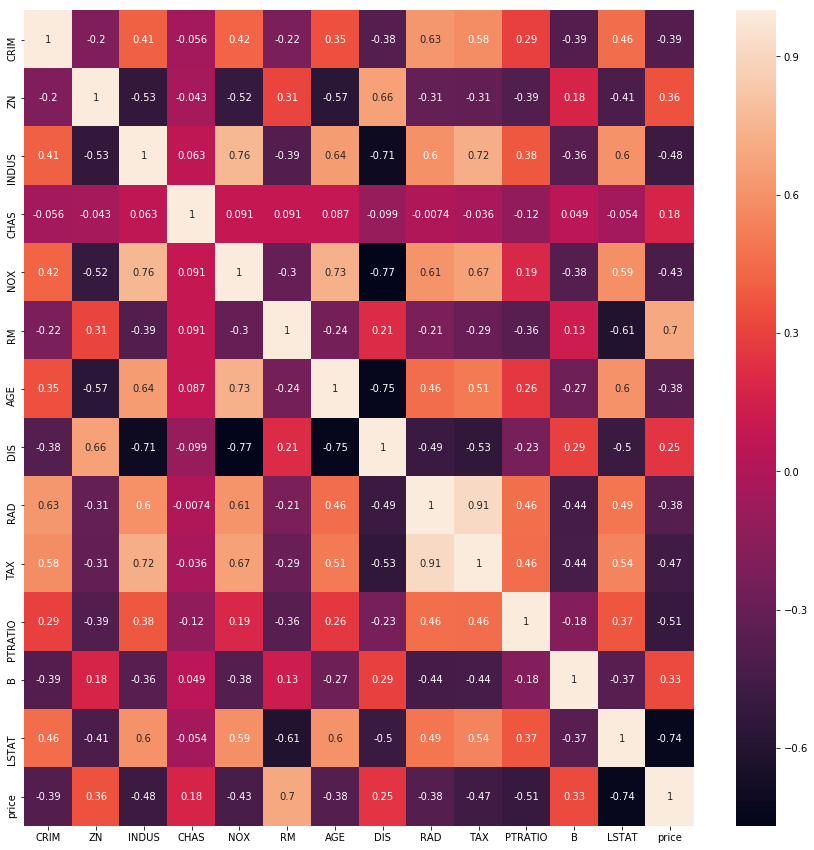

In [38]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=feature.corr(), annot=True)

In [23]:
feature_std=StandardScaler()

In [24]:
Y=feature['price']
X=feature.drop('price',axis=1)

In [7]:
type(feature_std)

sklearn.preprocessing.data.StandardScaler

In [25]:
x_std=feature_std.fit_transform(X)

In [33]:
from sklearn.ensemble import RandomForestRegressor

xtrain,xtest,ytrain,ytest=train_test_split(x_std,target,test_size=0.20,random_state=1234)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((404, 13), (102, 13), (404,), (102,))

In [36]:
param_grid_RF={'criterion':['mse','mae'],
              'max_features':[3,4],
              'max_depth':[3,4,5,7],
              'n_estimators':[300,400,500,600,700]}

In [40]:
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_estimator_
    return top_params

In [34]:
model_rf=RandomForestRegressor()

In [41]:
top_param_rf=GridSearch_BestParam(xtrain,ytrain,model_rf,param_grid_RF,cv=10)
print(top_param_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=700, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)


In [43]:
model_best=RandomForestRegressor(criterion=top_param_rf.criterion,max_depth=top_param_rf.max_depth,max_features=top_param_rf.max_features,n_estimators=top_param_rf.n_estimators)

In [44]:
model_best.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=700, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [46]:
model_best.score(xtrain,ytrain)

0.9600899097475668

In [47]:
model_best.score(xtest,ytest)

0.8969530218136805